In [29]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='plotly_mimetype+notebook'
from ipywidgets import widgets as wg
import yfinance as yf

In [30]:
tickers = ['FTSEMIB.MI','^GSPC','^IXIC','^DJI']

df = yf.download(
        tickers=tickers,
        period="3y",
        interval="1wk",
        group_by="column")
        
df.head(5)

[*********************100%***********************]  4 of 4 completed


Adj Close                                              Close  \
           FTSEMIB.MI          ^DJI        ^GSPC        ^IXIC FTSEMIB.MI   
Date                                                                       
2019-02-11    20212.0  25883.250000  2775.600098  7472.410156    20212.0   
2019-02-18    20263.0  26031.810547  2792.669922  7527.540039    20263.0   
2019-02-25    20695.0  26026.320312  2803.689941  7595.350098    20695.0   
2019-03-04    20484.0  25450.240234  2743.070068  7408.140137    20484.0   
2019-03-11    21045.0  25848.869141  2822.479980  7688.529785    21045.0   

                                                         High                \
                    ^DJI        ^GSPC        ^IXIC FTSEMIB.MI          ^DJI   
Date                                                                          
2019-02-11  25883.250000  2775.600098  7472.410156    20271.0  25883.720703   
2019-02-18  26031.810547  2792.669922  7527.540039    20361.0  26052.900391   
2019-02-25  26026.320312  2803.689941  7595.350098    20836.0  26241.419922   
2019-03-04  25450.240234  2743.070068  7408.140137    21010.0  26155.980469   
2019-03-11  25848.869141  2822.479980  7688.529785    21112.0  25927.910156   

            ...          Low                    Open                \
            ...        ^GSPC        ^IXIC FTSEMIB.MI          ^DJI   
Date        ...                                                      
2019-02-11  ...  2703.790039  7290.029785    19435.0  25142.810547   
2019-02-18  ...  2764.550049  7430.890137    20232.0  25849.849609   
2019-02-25  ...  2775.129883  7485.390137    20428.0  26126.150391   
2019-03-04  ...  2722.270020  7332.919922    20820.0  26122.189453   
2019-03-11  ...  2747.610107  7442.399902    20588.0  25208.000000   

                                          Volume                           \
                  ^GSPC        ^IXIC  FTSEMIB.MI        ^DJI        ^GSPC   
Date                                                                        
2019-02-11  2712.399902  7327.370117  2379447100  1424680000  18338580000   
2019-02-18  2769.280029  7450.750000  2188889100  1103970000  14356680000   
2019-02-25  2804.350098  7585.299805  2391807100  1423240000  19586400000   
2019-03-04  2814.370117  7636.620117  2506963800  1363660000  18620090000   
2019-03-11  2747.610107  7442.560059  2515573000  1878630000  20361870000   

                         
                  ^IXIC  
Date                     
2019-02-11  10477050000  
2019-02-18   8839310000  
2019-02-25  12154480000  
2019-03-04  11641280000  
2019-03-11  12378400000  

[5 rows x 24 columns]

In [31]:
df = df.filter(regex="Adj Close")
df = df.dropna()
df.head(5)

Adj Close                                        
           FTSEMIB.MI          ^DJI        ^GSPC        ^IXIC
Date                                                         
2019-02-11    20212.0  25883.250000  2775.600098  7472.410156
2019-02-18    20263.0  26031.810547  2792.669922  7527.540039
2019-02-25    20695.0  26026.320312  2803.689941  7595.350098
2019-03-04    20484.0  25450.240234  2743.070068  7408.140137
2019-03-11    21045.0  25848.869141  2822.479980  7688.529785

<AxesSubplot:xlabel='Date'>

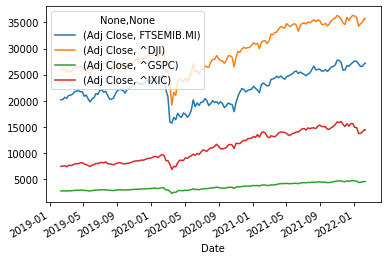

In [32]:
df.plot()

<AxesSubplot:xlabel='Date'>

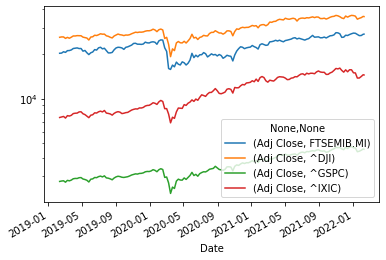

In [33]:
df.plot(logy=True)

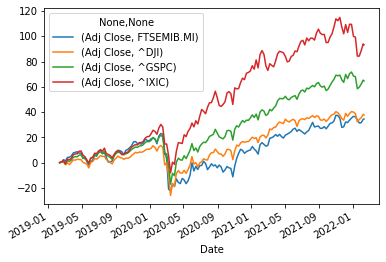

In [34]:
# use the first date as index 
reference_value = df.iloc[0]
# dividing by the series divides each column by the 
# corresponding element in the series
tmp_df = df.div(reference_value) * 100 - 100
tmp_df.plot()
prepared_df = df.copy()

In [41]:
# instantiate the figure object
fig = go.Figure()

# add a scatter trace for every column
for col in df.columns:
    fig.add_scatter(x=df.index, y=df[col], name=col[1])

# change the scale to logarithmic and add title
fig.update_layout(
    yaxis=dict(type="log"),
    title=f"Index prices {df.index[0].strftime('%B %Y')} - " \
          +                f"{df.index[-1].strftime('%B %Y')}"
)

fig.show()